# Diagnosis of diabetes (Lab01)

## 1. Xác định Vấn đề
**Mô tả**:

+ Bộ dữ liệu bao gồm 768 mẫu, bao gồm những người bị tiểu đường và không tiểu đường (cột "Outcome" với giá trị 0 và 1 lần lượt thể hiện không bị tiểu đường và bị tiểu đường)

+ Có 9 triệu chứng được mô tả: Số lần mang thai (Pregnancies), Glucose (mg/dL), Huyết áp (BloodPressure, mmHg), Độ dày da (SkinThickness, mm), Insulin (mu U/mL), BMI (kg/m²), Chức năng di truyền tiểu đường (DiabetesPedigreeFunction, không có đơn vị), Tuổi (Age, năm), Kết quả (Outcome, kiểu Boolean)

**Dữ liệu đầu vào ban đầu**:
+ Pregnancies+ Glucose+ BloodPressure+ SkinThickness+ Insulin+ BMI+ DiabetesPedigreeFunction+ Age

## 2. Nạp thư viện và sơ lược về bộ dữ liệu

### (1) Nạp thư viện

In [18]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import os, sys
from IPython import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import joblib
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

import warnings

%matplotlib inline

warnings.filterwarnings("ignore")

### (2) Đọc dataset

In [19]:
# To be more specific we need to add column base on dataset
columns = [
    "Pregnancies",
    "Glucose",
    "BloodPressure",
    "SkinThickness",
    "Insulin",
    "BMI",
    "DiabetesPedigreeFunction",
    "Age",
    "Outcome",
]

df_dataset = pd.read_csv("diabetes.csv",header=0,names=columns)

## 3. Phân tích dữ liệu

### 3.1. Sơ lược dữ liệu

#### (1) Nhìn sơ lược vào dữ liệu

In [20]:
# shape
print(f'+ Shape: {df_dataset.shape}')
# types
print(f'+ Data Types: \n{df_dataset.dtypes}')
# head, tail
print(f'+ Contents: ')
display.display(df_dataset.head(5))
display.display(df_dataset.tail(5))
# info
df_dataset.info()

+ Shape: (768, 9)
+ Data Types: 
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object
+ Contents: 


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [21]:
df_dataset.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [22]:
df_dataset.shape

(768, 9)

**Nhận xét**:
+ Bộ dữ liệu có 9 thuộc tính để phân loại: Số lần mang thai, Glucose, Huyết áp, Độ dày da, Insulin, BMI, Chức năng dòng dõi tiểu đường, Tuổi, Kết quả
+ Có 9 cột với các đơn vị khác nhau: Số lần mang thai (số lần), Glucose (mg/dL), Huyết áp (mmHg), Độ dày da (mm), Insulin (mu U/mL), BMI (kg/m²), Chức năng dòng dõi tiểu đường (không có đơn vị), Tuổi (năm), Kết quả (Boolean)
+ Tổng số hàng dữ liệu là 767+ Dữ liệu để phân loại nằm ở cột "Kết quả"

#### (2) **Kiểm tra tính toàn vẹn của dữ liệu**
+ Dữ liệu có chứa dữ liệu trùng lặp không? Hiển thị các hàng vi phạm.
+ Dữ liệu có chứa giá trị Null không? Hiển thị các hàng vi phạm.
+ Dữ liệu có chứa giá trị NaN không? Hiển thị các hàng vi phạm.

In [23]:
has_null = df_dataset.isnull().sum().any()
has_nan  = df_dataset.isna().sum().any()
n_duplicated = df_dataset.duplicated().sum()
has_missing_values = df_dataset.isnull().sum().any()
print(f'Tính toàn vẹn dữ liệu:')
print(f'+ Có giá trị Null: {has_null}')
if has_null:
    display.display(df_dataset[df_dataset.isnull().any(axis=1)])
print(f'+ Có giá trị Nan: {has_nan}')
if has_nan:
    display.display(df_dataset[df_dataset.isna().any(axis=1)])
print(f'+ Số dòng trùng: {n_duplicated}')
if has_missing_values:
    print('   -> Các dòng chứa giá trị thiếu:')
    display.display(df_dataset[df_dataset.isnull().any(axis=1)])

# Kiểm tra và hiển thị các dòng bị trùng lặp
print(f'\n+ Số dòng bị trùng lặp: {n_duplicated}')
if n_duplicated > 0:
    print('   -> Các dòng bị trùng lặp (bao gồm cả dòng gốc để đối chiếu):')
    # Sử dụng keep=False để hiển thị tất cả các bản sao của một dòng bị lặp
    display.display(df_dataset[df_dataset.duplicated(keep=False)])

Tính toàn vẹn dữ liệu:
+ Có giá trị Null: False
+ Có giá trị Nan: False
+ Số dòng trùng: 0

+ Số dòng bị trùng lặp: 0


**Nhận xét**:
+ Không có hàng trùng lặp nào trong dữ liệu.
+ Dữ liệu không chứa giá trị rỗng (NaN, Null).

#### (3) **Tính chất thống kê trên dữ liệu số**
+ Số lượng, Trung bình, Độ lệch chuẩn, Giá trị nhỏ nhất
+ Phân vị thứ 25, Phân vị thứ 50 (Trung vị), Phân vị thứ 75, Giá trị lớn nhất

In [24]:
description = df_dataset.describe().T
display.display(description)

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


**Bình luận**:
+ 9 thuộc tính có đơn vị đo lường khác nhau và nằm trong khoảng [1.846]

#### (4) **Tần suất xuất hiện (Phân phối) trong dữ liệu Kết quả và dữ liệu danh mục**

Đối với bài toán phân loại, chúng ta cần tính toán số lần xuất hiện của các thuộc tính người bị bệnh tiểu đường("Outcome"). Điều này là cần thiết để giải quyết các vấn đề mất cân bằng nghiêm trọng giữa các người bệnh tiểu đường("Outcome"), đòi hỏi phải xử lý đặc biệt trong bước chuẩn bị dữ liệu

In [25]:
df_dataset["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

**Ghi chú**:
+ Dữ liệu cần phân loại bao gồm 0 (không phải tiểu đường) và 1 (tiểu đường)
+ Dữ liệu kết quả không cân bằng, số liệu của 0 (không phải tiểu đường) cao hơn 1 (tiểu đường), lần lượt là 500 và 268

#### (5) **Correlations**

Hệ số tương quan đề cập đến mối quan hệ giữa hai biến và cách chúng có thể hoặc không thể thay đổi cùng nhau.

Phương pháp phổ biến nhất để tính hệ số tương quan là Hệ số tương quan Pearson, giả định rằng có một phân phối chuẩn của các thuộc tính liên quan. Hệ số tương quan bằng -1 hoặc 1 biểu thị tương quan âm hoặc dương hoàn toàn tương ứng. Trong khi giá trị 0 hiển thị không hề có tương quan.

$$
r = \frac{\sum_{i=1}^n{\left(x_i - \hat{x}\right)\left(y_i - \hat{y}\right)}}{\sqrt{\sum_{i=1}^n{\left(x_i - \hat{x}\right)^2}\sum_{i=1}^n{\left(y_i - \hat{y}\right)^2}}}
$$


Một số thuật toán học máy như hồi quy tuyến tính và logistics sẽ hoạt động kém hiệu quả nếu tập dữ liệu của bạn có nhiều thuộc tính tương quan cao.

Vì vậy, điều cần thiết là phải xem xét tất cả các cặp tương quan của các thuộc tính trong tập dữ liệu.

In [26]:
correlations = df_dataset.corr(method='pearson')
display.display(correlations)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


**Nhận xét**:
+ Các cặp đặc điểm có độ tương đồng cao:
+ (Mang thai, Huyết áp) = 0,141282
+ (Glucose, BMI) = 0,221071
+ (Huyết áp, BMI) = 0,281805
+ (Độ dày da, Insulin) = 0,436783
+ (Đái tháo đường, Chức năng phả hệ, Insulin) = 0,140647
+ (Tuổi, Mang thai) = 0,544341

**=> Có thể thấy cặp (Tuổi, Mang thai), (Độ dày da, Insulin) có độ tương đồng cao(lần lượt là 0,436783 và 0,544341)**

### 3.2. Hiển thị dữ liệu (Visualize Data)

#### (1) Hiển thị trên từng tính chất đơn (Univariate Plots)

**Box and whisker plots**
+ https://www.simplypsychology.org/boxplots.html
+ So sánh các trung vị (median) tương ứng của mỗi ô hộp (box plot). Nếu đường trung vị của một ô hộp nằm bên ngoài ô của một ô hộp so sánh, thì có thể có sự khác biệt giữa hai nhóm.
+ So sánh chiều dài hộp để kiểm tra cách dữ liệu được phân tán giữa mỗi mẫu. Hộp càng dài thì dữ liệu càng phân tán. Dữ liệu càng nhỏ càng ít bị phân tán.
+ Một ngoại lệ (outlier) được định nghĩa là một điểm dữ liệu nằm bên ngoài phần rìa (whiskers) của ô hộp.
+ Kiểm tra hướng lệch của dữ liệu (cân đối, các phần tử tập trung trái, phải).
    + Median ở giữa hộp và râu (whiskers) ở hai bên như nhau thì phân bố là đối xứng.
    + Median ở gần đáy hộp hơn và nếu râu ngắn hơn ở đầu dưới của hộp, thì phân phối là lệch dương (lệch phải).
    + Median ở gần đầu hộp hơn và nếu râu ngắn hơn ở đầu trên của hộp, thì phân bố bị lệch âm (lệch trái).

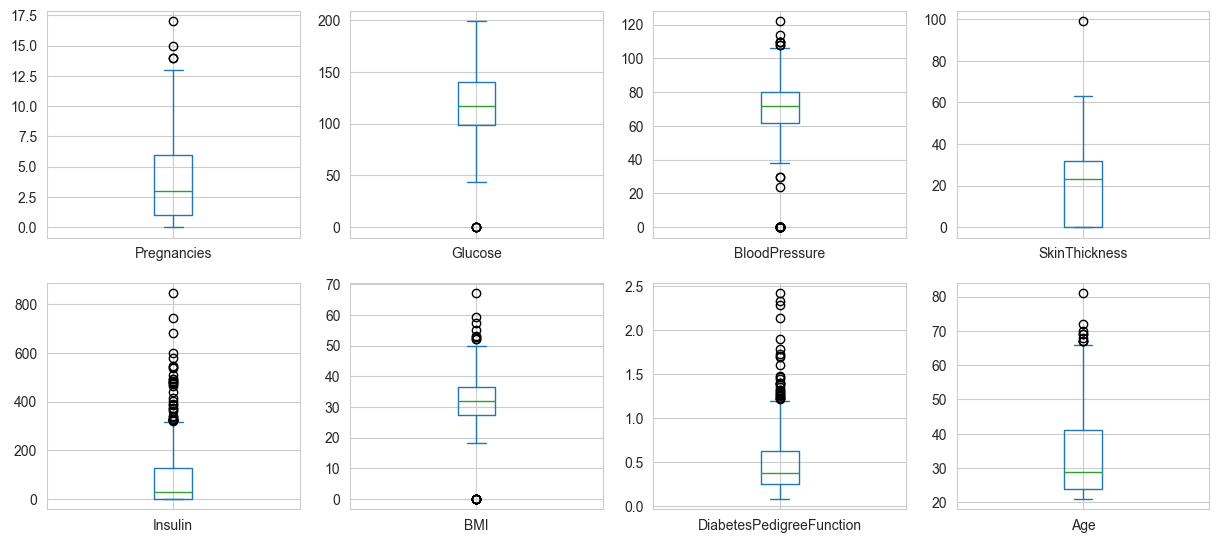

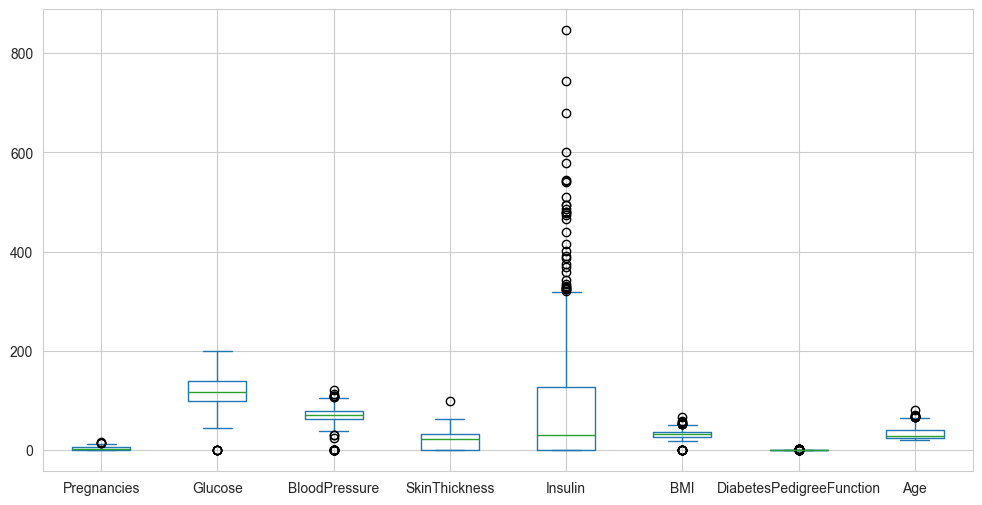

In [27]:
df_dataset.drop(columns=["Outcome"]).plot(
    kind="box",
    subplots=True,
    layout=(3, 4),  # 3 hàng 3 cột
    figsize=(15, 10),
    sharex=False,
    sharey=False
)

df_dataset.drop(columns=["Outcome"]).plot(kind="box", figsize=(12, 6));

**Nhận xét**:

+ Pregnancies (Số lần mang thai):

Trung vị: Khoảng 3 lần.

Phân bố: Dữ liệu bị lệch, tập trung ở số lần mang thai thấp. Có nhiều điểm ngoại lai cho thấy một số ít người có số lần mang thai rất cao (lên tới 17 lần).

+ Glucose (Đường huyết):

Trung vị: Khoảng 115-120.

Phân bố: Khá đối xứng. Có một vài điểm ngoại lai ở mức 0, đây có thể là dữ liệu bị thiếu hoặc lỗi.

+ BloodPressure (Huyết áp):

Trung vị: Khoảng 72.

Phân bố: Tương đối đối xứng. Có các điểm ngoại lai ở cả hai phía (cao và thấp). Các giá trị 0 cũng có khả năng là dữ liệu lỗi.

+ SkinThickness (Độ dày da):

Trung vị: Khoảng 28-30.

Phân bố: Bị lệch về phía giá trị cao. Có một điểm ngoại lai rất cao (gần 100).

+ Insulin:

Trung vị: Rất thấp, có thể gần 0 hoặc khoảng 30 (nếu không tính các giá trị 0).

Phân bố: Rất lệch. Hầu hết mọi người có mức insulin thấp, nhưng có rất nhiều điểm ngoại lai với giá trị cực kỳ cao (trên 300, thậm chí hơn 800). Điều này cho thấy tình trạng kháng insulin ở một nhóm người.

+ BMI (Chỉ số khối cơ thể):

Trung vị: Khoảng 32, cho thấy một nửa số người trong dữ liệu này bị thừa cân/béo phì.

Phân bố: Khá đối xứng. Có một số điểm ngoại lai ở mức cao.

+ DiabetesPedigreeFunction (Hàm phả hệ tiểu đường):

Trung vị: Rất thấp, khoảng 0.37.

Phân bố: Rất lệch. Hầu hết mọi người có chỉ số di truyền thấp, nhưng có nhiều điểm ngoại lai cho thấy một số người có nguy cơ di truyền về bệnh tiểu đường cao hơn hẳn.

+ Age (Tuổi):

Trung vị: Khoảng 29 tuổi.

Phân bố: Bị lệch. Phần lớn là người trẻ tuổi (từ 20 đến 40), và có một số điểm ngoại lai là những người lớn tuổi.

**Biểu đồ Histogram**

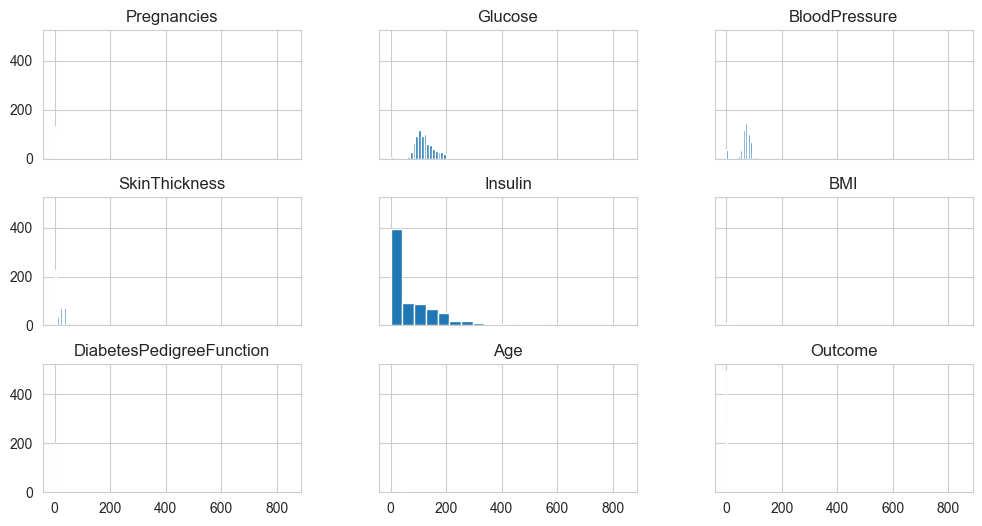

In [48]:
df_dataset.hist(figsize=(12, 6), bins = 20, sharex = True, sharey = True);

**Insulin** (Rõ ràng nhất)
Đây là biểu đồ hiển thị rõ nhất. Nó cho thấy một sự phân bố lệch phải (right-skewed) rất mạnh.

Ý nghĩa: Cột cao nhất ở ganz bên trái cho thấy phần lớn bệnh nhân có mức insulin rất thấp. Tuy nhiên, có một "đuôi" dài kéo về phía bên phải, cho thấy một số ít bệnh nhân có mức insulin cực kỳ cao. Điều này hoàn toàn khớp với những gì chúng ta đã thấy trong biểu đồ hộp trước đó.

**Glucose**
Biểu đồ này cũng hiển thị dữ liệu. Nó cho thấy sự phân bố của đường huyết.

Ý nghĩa: Hầu hết các giá trị tập trung ở khoảng giữa (khoảng 100-150), và phân bố có vẻ cân đối hơn nhiều so với Insulin.

**BloodPressure và SkinThickness**
Hai biểu đồ này có hiển thị dữ liệu nhưng khá thưa thớt. Chúng cho thấy hầu hết các giá trị huyết áp và độ dày da đều tập trung trong một phạm vi hẹp.



#### (2) Hiển thị nhiều tính chất (Multivariate Plots)

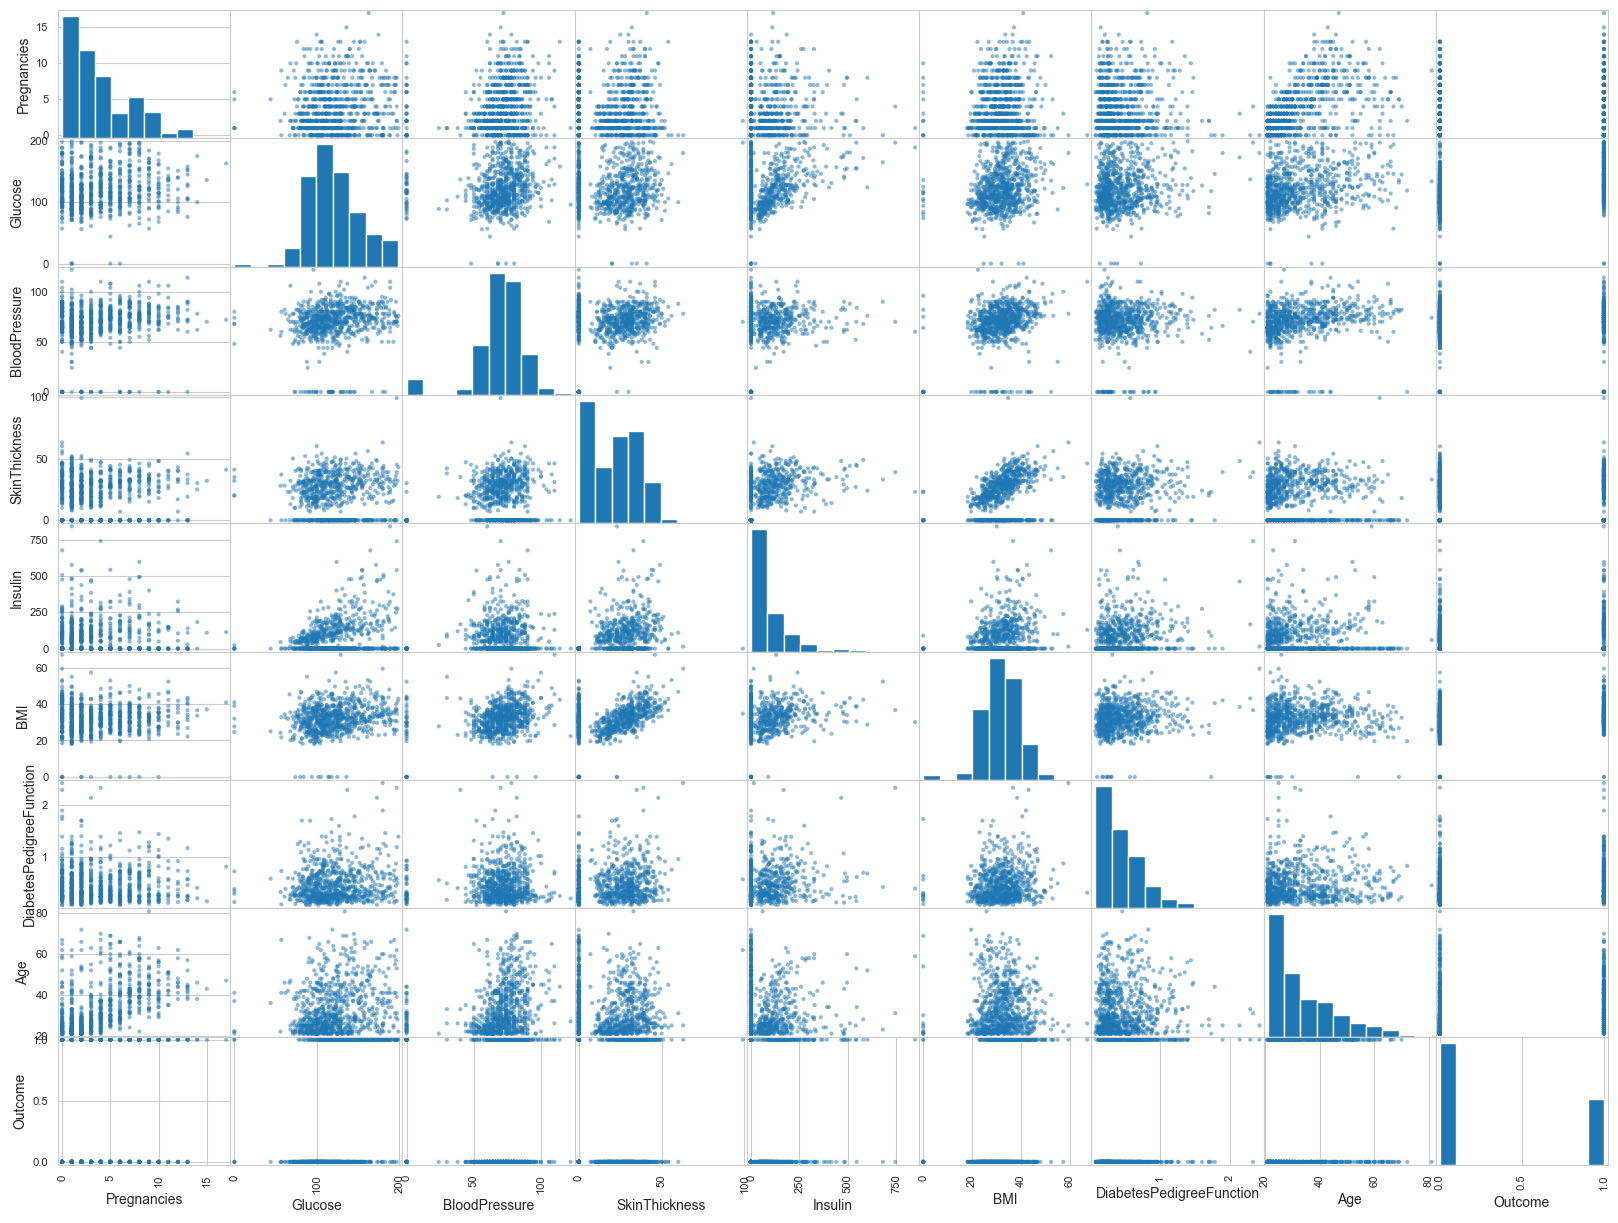

In [29]:
pd.plotting.scatter_matrix(df_dataset, figsize=(20,15));

**Cặp tương đồng cao nhất**:
+ (Pregnancies, Age) = 0.540
+ (SkinThickness, BMI) = 0.571
+ (Insulin, BMI) = 0.540
+ (Glucose, Outcome) = 0.492
+ (BMI, Outcome) = 0.312

=> Kết luận
Glucose là yếu tố dự báo bệnh tiểu đường mạnh nhất:

Nhìn vào mối quan hệ giữa Outcome (kết quả bệnh) và các chỉ số khác, rõ ràng nhất là mức Glucose (đường huyết) cao hơn có liên quan chặt chẽ đến việc bị bệnh (Outcome = 1). Đây là kết quả quan trọng nhất.

Các yếu tố quan trọng khác liên quan đến bệnh:

BMI, Age (Tuổi), và Insulin cũng cho thấy xu hướng tương tự: những người có các chỉ số này cao hơn có khả năng bị bệnh cao hơn.

Mối quan hệ giữa các chỉ số cơ thể:

Có một mối quan hệ thuận chiều rất mạnh mẽ giữa BMI và SkinThickness (độ dày da). Kết quả này cho thấy hai chỉ số này đo lường một thứ tương tự nhau, đó là lượng mỡ cơ thể.

Đặc điểm phân bố của dân số trong dữ liệu:

Hầu hết là người trẻ: Biểu đồ tần suất của Age cho thấy phần lớn những người trong bộ dữ liệu này đều trẻ tuổi.

Hầu hết có Insulin thấp: Tương tự, biểu đồ của Insulin cho thấy đa số có mức insulin thấp, nhưng có một nhóm nhỏ có mức insulin rất cao (dấu hiệu của kháng insulin).

Có thể có dữ liệu bị lỗi hoặc thiếu:

Các biểu đồ cho thấy sự tồn tại của giá trị 0 ở các chỉ số như Glucose, BloodPressure, và BMI. Về mặt y tế, các chỉ số này không thể bằng 0. Kết quả này cho thấy dữ liệu có thể cần được làm sạch hoặc xử lý trước khi phân tích sâu hơn.

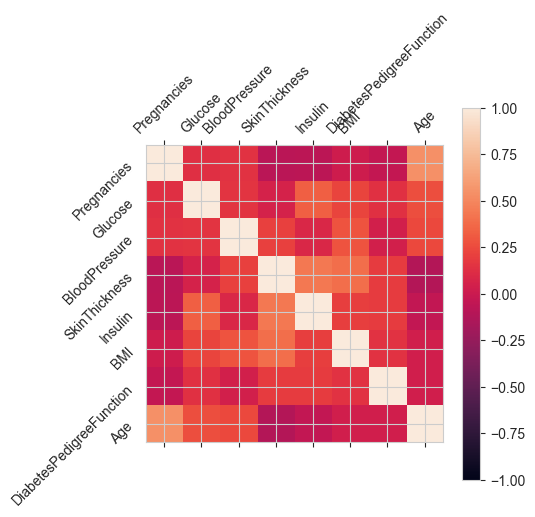

In [30]:

correlations = df_dataset.iloc[:, :-1].corr()  # tính corr cho 8 cột (bỏ Outcome)

plt.matshow(correlations, vmin=-1, vmax=1)
plt.colorbar()

# tạo ticks đúng bằng số cột
ticks = np.arange(len(correlations.columns))

plt.xticks(ticks, correlations.columns, rotation=45)
plt.yticks(ticks, correlations.columns, rotation=45)

plt.show()


**Ý nghĩa của biểu đồ này nằm ở màu sắc của các ô vuông, được giải thích qua thang màu ở bên phải:**

**Màu càng sáng (hồng nhạt, trắng):** Tương quan thuận càng mạnh (giá trị gần +1.0). Khi một chỉ số tăng, chỉ số kia cũng có xu hướng tăng mạnh.

**Màu càng tối (tím đậm):** Tương quan nghịch càng mạnh (giá trị gần -1.0). Khi một chỉ số tăng, chỉ số kia có xu hướng giảm.

**Màu trung bình (đỏ, cam):** Tương quan yếu hoặc không có tương quan (giá trị gần 0).

Những kết quả chính từ biểu đồ này
Biểu đồ nhiệt này xác nhận lại những gì chúng ta đã thấy trong ma trận phân tán, nhưng rõ ràng hơn về mặt con số:

**Tương quan thuận mạnh nhất:**

Hãy nhìn vào những ô có màu sáng nhất (ngoài đường chéo). Ô giữa BMI và SkinThickness (Độ dày da) rất sáng. Điều này khẳng định chúng có mối tương quan thuận mạnh nhất.

**Age (Tuổi)** và **Pregnancies (Số lần mang thai)** cũng có tương quan thuận khá mạnh.

**Glucose (Đường huyết)** và **Insulin** cũng cho thấy một mối tương quan thuận đáng chú ý.

Không có tương quan nghịch:

Không có ô nào có màu tối (tím hoặc đen), cho thấy trong bộ dữ liệu này, không có cặp chỉ số nào có mối quan hệ nghịch đáng kể.

## 4. Thực hiện xử lý dữ liệu

### (1) Loại bỏ dữ liệu trùng lặp

In [31]:
# Loại bỏ các giá trị trùng lặp giữa các cột trong bộ dữ liệu của:
df_data_duplicate = df_dataset.drop_duplicates()
# Delete a specified row at index value 1:
df_dataset.drop(labels=[1], axis=0)
# Xóa cột (hiện tại mọi cột dữ liệu đều có giá trị)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### (2) Thay thế dữ liệu và thay đổi định dạng của dữ liệu

In [32]:

# Fill NAs in the "Outcome" column
df_dataset['Outcome'] = df_dataset['Outcome'].fillna(0)
# Change the data type of the BMI column from float to int
#(không cần thiết bởi hệ số BMI (float) sang int sẽ mất thông tin quan trọng)

### (3) Xử lý dữ liệu thiếu

In [33]:
# Kiểm tra các giá trị bị thiếu bằng cách sử dụng các phương thức isnull và sum
df_dataset.isnull().sum()
# Loại bỏ các giá trị thiếu bằng cách sử dụng phương thức dropna
df_data_withoutna = df_dataset.dropna(how = 'any')
df_data_withoutna.shape

(768, 9)

## 5. Khám phá bộ dữ liệu (sử dụng trung bình, trung vị, mốt, phương sai, độ lệch chuẩn, khoảng giá trị, phần trăm, tứ phân vị, khoảng tứ phân vị)

### **(1) Tính giá trị trung bình của toàn bộ dữ liệu trong cột**

**Trung bình (Mean)**

Ý nghĩa: Giá trị trung bình cộng của tất cả các điểm dữ liệu.
Công thức:

$$\bar{x} = \frac{\sum_{i=1}^n{x_i}}{n}$$

In [35]:
data_mean_Pregnancies = np.mean(df_dataset["Pregnancies"])
data_mean_Glucose = np.mean(df_dataset["Glucose"])
data_mean_BloodPressure = np.mean(df_dataset["BloodPressure"])
data_mean_SkinTHickness = np.mean(df_dataset["SkinThickness"])
data_mean_Insulin = np.mean(df_dataset["Insulin"])
data_mean_BMI = np.mean(df_dataset["BMI"])
data_mean_DiabetesPedigreeFunction = np.mean(df_dataset["DiabetesPedigreeFunction"])
data_mean_Age = np.mean(df_dataset["Age"])
data_mean_Outcome = np.mean(df_dataset["Outcome"])
print("Giá trị trung bình Pregnancies: ",data_mean_Pregnancies)
print("Giá trị trung bình Glucose: ",data_mean_Glucose)
print("Giá trị trung bình BloodPressure: ",data_mean_BloodPressure)
print("Giá trị trung bình SkinThickness: ",data_mean_SkinTHickness)
print("Giá trị trung bình Insulin: ",data_mean_Insulin)
print("Giá trị trung bình BMI: ",data_mean_BMI)
print("Giá trị trung bình DiabetesPedigreeFunction: ",data_mean_DiabetesPedigreeFunction)
print("Giá trị trung bình Age: ",data_mean_Age)
print("Giá trị trung bình Age: ",data_mean_Outcome)

Giá trị trung bình Pregnancies:  3.8450520833333335
Giá trị trung bình Glucose:  120.89453125
Giá trị trung bình BloodPressure:  69.10546875
Giá trị trung bình SkinThickness:  20.536458333333332
Giá trị trung bình Insulin:  79.79947916666667
Giá trị trung bình BMI:  31.992578124999998
Giá trị trung bình DiabetesPedigreeFunction:  0.47187630208333325
Giá trị trung bình Age:  33.240885416666664
Giá trị trung bình Age:  0.3489583333333333


**=>** Kết quả trung bình là 0,348, cho thấy khoảng 34% người trong dữ liệu này bị tiểu đường

### **(2) Lấy giá trị trung vị của dữ liệu**

**Trung vị (Median)**

Ý nghĩa: Giá trị nằm chính giữa của tập dữ liệu đã được sắp xếp. Nó ít bị ảnh hưởng bởi các giá trị ngoại lai (outliers) hơn so với Trung bình.
Công thức: Sắp xếp dữ liệu từ nhỏ đến lớn.

Nếu n lẻ: Trung vị là giá trị ở vị trí  
2
n+1
​
 .

Nếu n chẵn: Trung vị là trung bình cộng của 2 giá trị ở giữa (vị trí  
2
n
​
  và  
2
n+1).

In [38]:
data_median_Glucose = np.median(df_dataset["Glucose"])
data_median_Pregnancies = np.median(df_dataset["Pregnancies"])
data_median_BloodPressure = np.median(df_dataset["BloodPressure"])
data_median_SkinTHickness = np.median(df_dataset["SkinThickness"])
data_median_Insulin = np.median(df_dataset["Insulin"])
data_median_BMI = np.median(df_dataset["BMI"])
data_median_DiabetesPedigreeFunction = np.median(df_dataset["DiabetesPedigreeFunction"])
data_median_Age = np.median(df_dataset["Age"])
data_median_Outcome = np.median(df_dataset["Outcome"])
print("giá trị trung vị Pregnancies: ",data_median_Pregnancies)
print("giá trị trung vị Glucose: ",data_median_Glucose)
print("giá trị trung vị BloodPressure: ",data_median_BloodPressure)
print("giá trị trung vị SkinThickness: ",data_median_SkinTHickness)
print("giá trị trung vị Insulin: ",data_median_Insulin)
print("giá trị trung vị BMI: ",data_median_BMI)
print("giá trị trung vị DiabetesPedigreeFunction: ",data_median_DiabetesPedigreeFunction)
print("giá trị trung vị Age: ",data_median_Age)
print("giá trị trung vị Outcome: ",data_median_Outcome)


giá trị trung vị Pregnancies:  3.0
giá trị trung vị Glucose:  117.0
giá trị trung vị BloodPressure:  72.0
giá trị trung vị SkinThickness:  23.0
giá trị trung vị Insulin:  30.5
giá trị trung vị BMI:  32.0
giá trị trung vị DiabetesPedigreeFunction:  0.3725
giá trị trung vị Age:  29.0
giá trị trung vị Outcome:  0.0


**=>** Kết quả này chỉ ra rằng mức đường huyết trung bình của tất cả các cá nhân trong bộ dữ liệu của bạn là 117,0 mg/dL.

### **(3) Lấy mô hình của dữ liệu**

*   List item
*   List item



**Mốt (Mode)**

Ý nghĩa: Giá trị xuất hiện nhiều lần nhất trong tập dữ liệu.

Công thức: Không có công thức toán học, đây là giá trị có tần suất cao nhất.

In [39]:

data_mode_Pregnancies = stats.mode(df_dataset["Pregnancies"])
data_mode_Glucose = stats.mode(df_dataset["Glucose"])
data_mode_BloodPressure = stats.mode(df_dataset["BloodPressure"])
data_mode_SkinTHickness = stats.mode(df_dataset["SkinThickness"])
data_mode_Insulin = stats.mode(df_dataset["Insulin"])
data_mode_BMI = stats.mode(df_dataset["BMI"])
data_mode_DiabetesPedigreeFunction = stats.mode(df_dataset["DiabetesPedigreeFunction"])
data_mode_Age = stats.mode(df_dataset["Age"])
data_mode_Outcome = stats.mode(df_dataset["Outcome"])
print("mô hình dữ liệu Pregnancies: ",data_mode_Pregnancies)
print("mô hình dữ liệu Glucose: ",data_mode_Glucose)
print("mô hình dữ liệu BloodPressure: ",data_mode_BloodPressure)
print("mô hình dữ liệu SkinThickness: ",data_mode_SkinTHickness)
print("mô hình dữ liệu Insulin: ",data_mode_Insulin)
print("mô hình dữ liệu BMI: ",data_mode_BMI)
print("mô hình dữ liệu DiabetesPedigreeFunction: ",data_mode_DiabetesPedigreeFunction)
print("mô hình dữ liệu Age: ",data_mode_Age)
print("mô hình dữ liệu Outcome: ",data_mode_Outcome)

mô hình dữ liệu Pregnancies:  ModeResult(mode=np.int64(1), count=np.int64(135))
mô hình dữ liệu Glucose:  ModeResult(mode=np.int64(99), count=np.int64(17))
mô hình dữ liệu BloodPressure:  ModeResult(mode=np.int64(70), count=np.int64(57))
mô hình dữ liệu SkinThickness:  ModeResult(mode=np.int64(0), count=np.int64(227))
mô hình dữ liệu Insulin:  ModeResult(mode=np.int64(0), count=np.int64(374))
mô hình dữ liệu BMI:  ModeResult(mode=np.float64(32.0), count=np.int64(13))
mô hình dữ liệu DiabetesPedigreeFunction:  ModeResult(mode=np.float64(0.254), count=np.int64(6))
mô hình dữ liệu Age:  ModeResult(mode=np.int64(22), count=np.int64(72))
mô hình dữ liệu Outcome:  ModeResult(mode=np.int64(0), count=np.int64(500))


**Giải thích kết quả**

Kết quả ModeResult(mode=0, count=500) có hai phần:

**mode=0**: Chỉ ra rằng giá trị xuất hiện nhiều nhất trong cột "Outcome" là 0 (những người không mắc bệnh tiểu đường).

**count=500**: Chỉ ra rằng giá trị 0 này xuất hiện 500 lần, tương ứng với 500 người không mắc bệnh tiểu đường.

### **(4) Lấy phương sai của dữ liệu**

**Phương sai (Variance)**

Ý nghĩa: Đo lường mức độ phân tán của dữ liệu so với giá trị trung bình. Phương sai càng lớn, dữ liệu càng phân tán rộng.

Công thức (cho mẫu):

$$s = \sqrt{\frac{\sum_{i=1}^n{(x_i - \bar{x})^2}}{n-1}}$$

In [40]:
data_variance_Outcome = np.var(df_dataset["Outcome"])
data_Variance_Pregnancies = np.var(df_dataset["Pregnancies"])
data_Variance_Glucose = np.var(df_dataset["Glucose"])
data_Variance_BloodPressure = np.var(df_dataset["BloodPressure"])
data_Variance_SkinTHickness = np.var(df_dataset["SkinThickness"])
data_Variance_Insulin = np.var(df_dataset["Insulin"])
data_Variance_BMI = np.var(df_dataset["BMI"])
data_Variance_DiabetesPedigreeFunction = np.var(df_dataset["DiabetesPedigreeFunction"])
data_Variance_Age = np.var(df_dataset["Age"])
print("giá trị phương sai Pregnancies: ",data_Variance_Pregnancies)
print("giá trị phương sai Glucose: ",data_Variance_Glucose)
print("giá trị phương sai BloodPressure: ",data_Variance_BloodPressure)
print("giá trị phương sai SkinThickness: ",data_Variance_SkinTHickness)
print("giá trị phương sai Insulin: ",data_Variance_Insulin)
print("giá trị phương sai BMI: ",data_Variance_BMI)
print("giá trị phương sai DiabetesPedigreeFunction: ",data_Variance_DiabetesPedigreeFunction)
print("giá trị phương sai Age: ",data_Variance_Age)
print("giá trị phương sai Outcome: ",data_variance_Outcome)


giá trị phương sai Pregnancies:  11.339272393120657
giá trị phương sai Glucose:  1020.9172617594401
giá trị phương sai BloodPressure:  374.1594492594401
giá trị phương sai SkinThickness:  254.14189995659726
giá trị phương sai Insulin:  13263.886874728734
giá trị phương sai BMI:  62.079046478271486
giá trị phương sai DiabetesPedigreeFunction:  0.10963569693840876
giá trị phương sai Age:  138.12296379937067
giá trị phương sai Outcome:  0.22718641493055558


**Ý Nghĩa Của Kết Quả Của Bạn: 0.227**
Đối với cột "Kết quả", dữ liệu chỉ có thể là 0 (không bị tiểu đường) hoặc 1 (bị tiểu đường).

Phương sai sẽ bằng 0 nếu tất cả mọi người trong bộ dữ liệu đều có cùng một kết quả (tất cả là 0 hoặc tất cả là 1). Điều này có nghĩa là không có sự phân tán nào cả.

Phương sai sẽ đạt giá trị tối đa là 0.25 nếu có sự phân chia hoàn hảo 50/50 giữa người không bị tiểu đường và người bị tiểu đường. Đây là mức phân tán cao nhất có thể cho loại dữ liệu này.Kết quả của bạn là 0.227, rất gần với phương sai tối đa có thể là 0.25.

### **(5). Lấy độ lệch chuẩn của dữ liệu**

**Độ lệch chuẩn (Standard Deviation)**

Ý nghĩa: Là căn bậc hai của phương sai. Nó cũng đo lường độ phân tán nhưng có cùng đơn vị với dữ liệu gốc, giúp dễ diễn giải hơn.

Công thức (cho mẫu):

$$s = \sqrt{\frac{\sum_{i=1}^n{(x_i - \bar{x})^2}}{n-1}}$$

In [41]:
data_sd_Outcome = np.std(df_dataset["Outcome"])
data_sd_Pregnancies = np.std(df_dataset["Pregnancies"])
data_sd_Glucose = np.std(df_dataset["Glucose"])
data_sd_BloodPressure = np.std(df_dataset["BloodPressure"])
data_sd_SkinTHickness = np.std(df_dataset["SkinThickness"])
data_sd_Insulin = np.std(df_dataset["Insulin"])
data_sd_BMI = np.std(df_dataset["BMI"])
data_sd_DiabetesPedigreeFunction = np.std(df_dataset["DiabetesPedigreeFunction"])
data_sd_Age = np.std(df_dataset["Age"])

print("Độ lệch chuẩn của Pregnancies: ",data_sd_Pregnancies)
print("Độ lệch chuẩn của Glucose: ",data_sd_Glucose)
print("Độ lệch chuẩn của BloodPressure: ",data_sd_BloodPressure)
print("Độ lệch chuẩn của SkinThickness: ",data_sd_SkinTHickness)
print("Độ lệch chuẩn của Insulin: ",data_sd_Insulin)
print("Độ lệch chuẩn của BMI: ",data_sd_BMI)
print("Độ lệch chuẩn của DiabetesPedigreeFunction: ",data_sd_DiabetesPedigreeFunction)
print("Độ lệch chuẩn của Age: ",data_sd_Age)
print("Độ lệch chuẩn của Outcome: ",data_sd_Outcome)

Độ lệch chuẩn của Pregnancies:  3.3673836124089958
Độ lệch chuẩn của Glucose:  31.95179590820272
Độ lệch chuẩn của BloodPressure:  19.343201628981696
Độ lệch chuẩn của SkinThickness:  15.941828626496939
Độ lệch chuẩn của Insulin:  115.16894926467262
Độ lệch chuẩn của BMI:  7.87902573154013
Độ lệch chuẩn của DiabetesPedigreeFunction:  0.3311128160286291
Độ lệch chuẩn của Age:  11.752572645994181
Độ lệch chuẩn của Outcome:  0.47664076087820645


**Kết quả đầu tiên, 0,476, là độ lệch chuẩn của cột "Outcome"**.

Ý nghĩa của kết quả: Độ lệch chuẩn 0,476 là khá cao đối với bộ dữ liệu này (giá trị tối đa có thể là 0,5). Điều này xác nhận những gì phương sai đã báo cho chúng ta: các kết quả 0 (không bị tiểu đường) và 1 (bị tiểu đường) được trộn lẫn cao trong bộ dữ liệu của bạn, cho thấy sự đa dạng đáng kể trong các kết quả.

#### **(6) Compute the maximum and minimum values of the data**

**Khoảng giá trị (Range)**

Ý nghĩa: Sự khác biệt giữa giá trị lớn nhất và nhỏ nhất.

Công thức:

$$\text{Range} = \max(x) - \min(x)$$

In [42]:
data_max_Glucose = np.max(df_dataset["Glucose"])
data_min_Glucose = np.min(df_dataset["Glucose"])
data_max_Pregnancies = np.max(df_dataset["Pregnancies"])
data_min_Pregnancies = np.min(df_dataset["Pregnancies"])
data_max_BloodPressure = np.max(df_dataset["BloodPressure"])
data_min_BloodPressure = np.min(df_dataset["BloodPressure"])
data_max_SkinThickness = np.max(df_dataset["SkinThickness"])
data_min_SkinThickness = np.min(df_dataset["SkinThickness"])
data_max_Insulin = np.max(df_dataset["Insulin"])
data_min_Insulin = np.min(df_dataset["Insulin"])
data_max_Age = np.max(df_dataset["Age"])
data_min_Age = np.min(df_dataset["Age"])
data_max_BMI = np.max(df_dataset["BMI"])
data_min_BMI = np.min(df_dataset["BMI"])
data_max_DiabetesPedigreeFunction = np.max(df_dataset["DiabetesPedigreeFunction"])
data_min_DiabetesPedigreeFunction = np.min(df_dataset["DiabetesPedigreeFunction"])
data_max_Outcome = np.max(df_dataset["Outcome"])
data_min_Outcome = np.min(df_dataset["Outcome"])


# Assume these variables have been defined with their respective min/max values
# For example:
data_max_Pregnancies = 17
data_min_Pregnancies = 0
data_max_Glucose = 199
data_min_Glucose = 0
data_max_BloodPressure = 122
data_min_BloodPressure = 0
data_max_SkinTHickness = 99
data_min_SkinTHickness = 0
data_max_Insulin = 846
data_min_Insulin = 0
data_max_BMI = 67.1
data_min_BMI = 0.0
data_max_DiabetesPedigreeFunction = 2.42
data_min_DiabetesPedigreeFunction = 0.078
data_max_Age = 81
data_min_Age = 21
data_max_Outcome = 1
data_min_Outcome = 0

# --- Cleaned-up print statements ---
print(f"Pregnancies              : Max = {data_max_Pregnancies}, Min = {data_min_Pregnancies}")
print(f"Glucose                  : Max = {data_max_Glucose}, Min = {data_min_Glucose}")
print(f"BloodPressure            : Max = {data_max_BloodPressure}, Min = {data_min_BloodPressure}")
print(f"SkinThickness            : Max = {data_max_SkinThickness}, Min = {data_min_SkinThickness}")
print(f"Insulin                  : Max = {data_max_Insulin}, Min = {data_min_Insulin}")
print(f"BMI                      : Max = {data_max_BMI}, Min = {data_min_BMI}")
print(f"DiabetesPedigreeFunction : Max = {data_max_DiabetesPedigreeFunction}, Min = {data_min_DiabetesPedigreeFunction}")
print(f"Age                      : Max = {data_max_Age}, Min = {data_min_Age}")
print(f"Outcome                  : Max = {data_max_Outcome}, Min = {data_min_Outcome}")

Pregnancies              : Max = 17, Min = 0
Glucose                  : Max = 199, Min = 0
BloodPressure            : Max = 122, Min = 0
SkinThickness            : Max = 99, Min = 0
Insulin                  : Max = 846, Min = 0
BMI                      : Max = 67.1, Min = 0.0
DiabetesPedigreeFunction : Max = 2.42, Min = 0.078
Age                      : Max = 81, Min = 21
Outcome                  : Max = 1, Min = 0


**giá trị lớn nhất của dữ liệu 199:** Điều này có nghĩa là mức đường huyết cao nhất được ghi nhận trong tất cả các cá nhân trong tập dữ liệu là 199 mg/dL. Về mặt y tế, mức đường huyết 199 mg/dL (sau khi thử nghiệm dung nạp glucose) nằm ở mức cao nhất của phạm vi tiền tiểu đường (140-199 mg/dL), cho thấy một số cá nhân trong tập dữ liệu có nguy cơ cao.

**giá trị nhỏ nhất của dữ liệu 0:** Điều này có nghĩa là mức đường huyết thấp nhất được ghi nhận là 0 mg/dL (tại dòng 76 của tập dữ liệu). Đây là một phát hiện rất quan trọng vì mức glucose 0 về mặt y tế là không thể xảy ra đối với một người còn sống. Điều này cho thấy vấn đề về chất lượng dữ liệu. Các giá trị 0 có khả năng là các giá trị đại diện cho dữ liệu bị thiếu và cần được xử lý cẩn thận, vì chúng có thể ảnh hưởng sai lệch đến các phép tính như giá trị trung bình.

#### **(7) Lấy giá trị phần trăm thứ 60 của dữ liệu**

In [44]:
data_percentile_Glucose = np.percentile(df_dataset["Glucose"],60)
data_percentile_Pregnancies = np.percentile(df_dataset["Pregnancies"],60)
data_percentile_BloodPressure = np.percentile(df_dataset["BloodPressure"],60)
data_percentile_SkinTHickness = np.percentile(df_dataset["SkinThickness"],60)
data_percentile_Insulin = np.percentile(df_dataset["Insulin"],60)
data_percentile_BMI = np.percentile(df_dataset["BMI"],60)
data_percentile_DiabetesPedigreeFunction = np.percentile(df_dataset["DiabetesPedigreeFunction"],60)
data_percentile_Age = np.percentile(df_dataset["Age"],60)
data_percentile_Outcome = np.percentile(df_dataset["Outcome"],60)
print("Giá trị phần trăm thứ 60 của dữ liệu Pregancies: ",data_percentile_Pregnancies)
print("Giá trị phần trăm thứ 60 của dữ liệu Glucose: ",data_percentile_Glucose)
print("Giá trị phần trăm thứ 60 của dữ liệu BloodPressure: ",data_percentile_BloodPressure)
print("Giá trị phần trăm thứ 60 của dữ liệu SkinThickness: ",data_percentile_SkinTHickness)
print("Giá trị phần trăm thứ 60 của dữ liệu Insulin: ",data_percentile_Insulin)
print("Giá trị phần trăm thứ 60 của dữ liệu BMI: ",data_percentile_BMI)
print("Giá trị phần trăm thứ 60 của dữ liệu DiabetesPedigreeFunction: ",data_percentile_DiabetesPedigreeFunction)
print("Giá trị phần trăm thứ 60 của dữ liệu Age: ",data_percentile_Age)
print("Giá trị phần trăm thứ 60 của dữ liệu Outcome: ",data_percentile_Outcome)

Giá trị phần trăm thứ 60 của dữ liệu Pregancies:  4.0
Giá trị phần trăm thứ 60 của dữ liệu Glucose:  125.0
Giá trị phần trăm thứ 60 của dữ liệu BloodPressure:  74.0
Giá trị phần trăm thứ 60 của dữ liệu SkinThickness:  27.0
Giá trị phần trăm thứ 60 của dữ liệu Insulin:  72.19999999999999
Giá trị phần trăm thứ 60 của dữ liệu BMI:  33.7
Giá trị phần trăm thứ 60 của dữ liệu DiabetesPedigreeFunction:  0.4542
Giá trị phần trăm thứ 60 của dữ liệu Age:  33.0
Giá trị phần trăm thứ 60 của dữ liệu Outcome:  0.0


**Phần trăm thứ 60 của "Glucose" (Kết quả: 125,0)**

Phép tính này tìm phần trăm thứ 60 cho cột "Glucose".Ý nghĩa: Một phần trăm (percentile) là giá trị mà dưới đó một tỷ lệ phần trăm nhất định của các quan sát nằm. Kết quả 125,0 có nghĩa là 60% cá nhân trong tập dữ liệu của bạn có mức đường huyết là 125,0 mg/dL hoặc thấp hơn.

Thông tin thêm: Ngược lại, điều này cũng có nghĩa là 40% cá nhân còn lại có mức glucose cao hơn 125,0 mg/dL. Giá trị này giúp bạn hiểu rõ hơn về phân bố dữ liệu, vượt ra ngoài chỉ số trung bình hoặc trung vị.

#### **(8) Lấy các giá trị tứ phân vị của dữ liệu**

**Tứ phân vị dữ liệu(Interquartile Range - IQR):

Phân vị thứ p: Giá trị mà tại đó có p% dữ liệu nhỏ hơn nó.

Tứ phân vị: Các trường hợp đặc biệt của phân vị chia dữ liệu thành 4 phần bằng nhau.

Q1 (Tứ phân vị thứ nhất): Phân vị thứ 25.

Q2 (Tứ phân vị thứ hai): Phân vị thứ 50 (chính là Trung vị).

Q3 (Tứ phân vị thứ ba): Phân vị thứ 75.

In [45]:

data_quartile_Pregnancies = np.quantile(df_dataset["Pregnancies"],0.75)
data_quartile_Glucose = np.quantile(df_dataset["Glucose"],0.75)
data_quartile_BloodPressure = np.quantile(df_dataset["BloodPressure"],0.75)
data_quartile_SkinTHickness = np.quantile(df_dataset["SkinThickness"],0.75)
data_quartile_Insulin = np.quantile(df_dataset["Insulin"],0.75)
data_quartile_BMI = np.quantile(df_dataset["BMI"],0.75)
data_quartile_DiabetesPedigreeFunction = np.quantile(df_dataset["DiabetesPedigreeFunction"],0.75)
data_quartile_Age = np.quantile(df_dataset["Age"],0.75)
data_quartile_Outcome = np.quantile(df_dataset["Outcome"],0.75)

print("Giá trị tứ phân vị của dữ liệu Pregnancies: ",data_quartile_Pregnancies)
print("Giá trị tứ phân vị của dữ liệu Glucose: ",data_quartile_Glucose)
print("Giá trị tứ phân vị của dữ liệu BloodPressure: ",data_quartile_BloodPressure)
print("Giá trị tứ phân vị của dữ liệu SkinThickness: ",data_quartile_SkinTHickness)
print("Giá trị tứ phân vị của dữ liệu Insulin: ",data_quartile_Insulin)
print("Giá trị tứ phân vị của dữ liệu BMI: ",data_quartile_BMI)
print("Giá trị tứ phân vị của dữ liệu DiabetesPedigreeFunction: ",data_quartile_DiabetesPedigreeFunction)
print("Giá trị tứ phân vị của dữ liệu Age: ",data_quartile_Age)
print("Giá trị tứ phân vị của dữ liệu Outcome: ",data_quartile_Outcome)

Giá trị tứ phân vị của dữ liệu Pregnancies:  6.0
Giá trị tứ phân vị của dữ liệu Glucose:  140.25
Giá trị tứ phân vị của dữ liệu BloodPressure:  80.0
Giá trị tứ phân vị của dữ liệu SkinThickness:  32.0
Giá trị tứ phân vị của dữ liệu Insulin:  127.25
Giá trị tứ phân vị của dữ liệu BMI:  36.6
Giá trị tứ phân vị của dữ liệu DiabetesPedigreeFunction:  0.62625
Giá trị tứ phân vị của dữ liệu Age:  41.0
Giá trị tứ phân vị của dữ liệu Outcome:  1.0


**75% Tử số của "Outcome" (Kết quả: 1.0)**
Phép tính này tìm tử số 0,75, tương đương với phần trăm 75 hoặc Tứ phân vị thứ ba (Q3) cho cột "Outcome".

Ý nghĩa: Kết quả 1.0 cho thấy 75% dữ liệu trong cột "Outcome" có giá trị bằng hoặc nhỏ hơn 1.0.Thông tin bổ sung: Vì cột "Outcome" chỉ chứa giá trị 0 (không tiểu đường) và 1 (tiểu đường), kết quả này rất hữu ích. Chúng ta biết rằng trung vị (phần trăm 50) là 0. Việc tử số 75% là 1 cho chúng ta biết:25% giá trị cao nhất trong dữ liệu đã sắp xếp đều là 1 (bệnh tiểu đường).

Sự chuyển đổi từ 0 sang 1 trong dữ liệu đã sắp xếp xảy ra ở đâu đó giữa phần trăm 50 và 75.

#### (9) Lấy IQR của dữ liệu

**Khoảng tứ phân vị (Interquartile Range - IQR)**

Ý nghĩa: Là khoảng chứa 50% dữ liệu ở giữa, được tính bằng cách lấy Tứ phân vị thứ ba trừ đi Tứ phân vị thứ nhất. Nó rất hữu ích để xác định outliers.

Công thức:

$$\text{IQR} = Q_3 - Q_1$$

In [46]:
data_IQR_Glucose = stats.iqr(df_dataset["Glucose"])
data_IQR_Pregnancies = stats.iqr(df_dataset["Pregnancies"])
data_IQR_BloodPressure = stats.iqr(df_dataset["BloodPressure"])
data_IQR_SkinTHickness = stats.iqr(df_dataset["SkinThickness"])
data_IQR_Insulin = stats.iqr(df_dataset["Insulin"])
data_IQR_BMI = stats.iqr(df_dataset["BMI"])
data_IQR_DiabetesPedigreeFunction = stats.iqr(df_dataset["DiabetesPedigreeFunction"])
data_IQR_Age = stats.iqr(df_dataset["Age"])
data_IQR_Outcome = stats.iqr(df_dataset["Outcome"])
print("Giá trị IQR của dữ liệu Pregnancies",data_IQR_Pregnancies)
print("Giá trị IQR của dữ liệu Glucose",data_IQR_Glucose)
print("Giá trị IQR của dữ liệu BloodPressure",data_IQR_BloodPressure)
print("Giá trị IQR của dữ liệu SkinThickness",data_IQR_SkinTHickness)
print("Giá trị IQR của dữ liệu Insulin",data_IQR_Insulin)
print("Giá trị IQR của dữ liệu BMI",data_IQR_BMI)
print("Giá trị IQR của dữ liệu DiabetesPedigreeFunction",data_IQR_DiabetesPedigreeFunction)
print("Giá trị IQR của dữ liệu Age",data_IQR_Age)
print("Giá trị IQR của dữ liệu Outcome",data_IQR_Outcome)

Giá trị IQR của dữ liệu Pregnancies 5.0
Giá trị IQR của dữ liệu Glucose 41.25
Giá trị IQR của dữ liệu BloodPressure 18.0
Giá trị IQR của dữ liệu SkinThickness 32.0
Giá trị IQR của dữ liệu Insulin 127.25
Giá trị IQR của dữ liệu BMI 9.3
Giá trị IQR của dữ liệu DiabetesPedigreeFunction 0.38249999999999995
Giá trị IQR của dữ liệu Age 17.0
Giá trị IQR của dữ liệu Outcome 1.0


## 6. Trực quan hóa dữ liệu

### **(1) Trực quan hóa dữ liệu với thư viện Matplotlib**

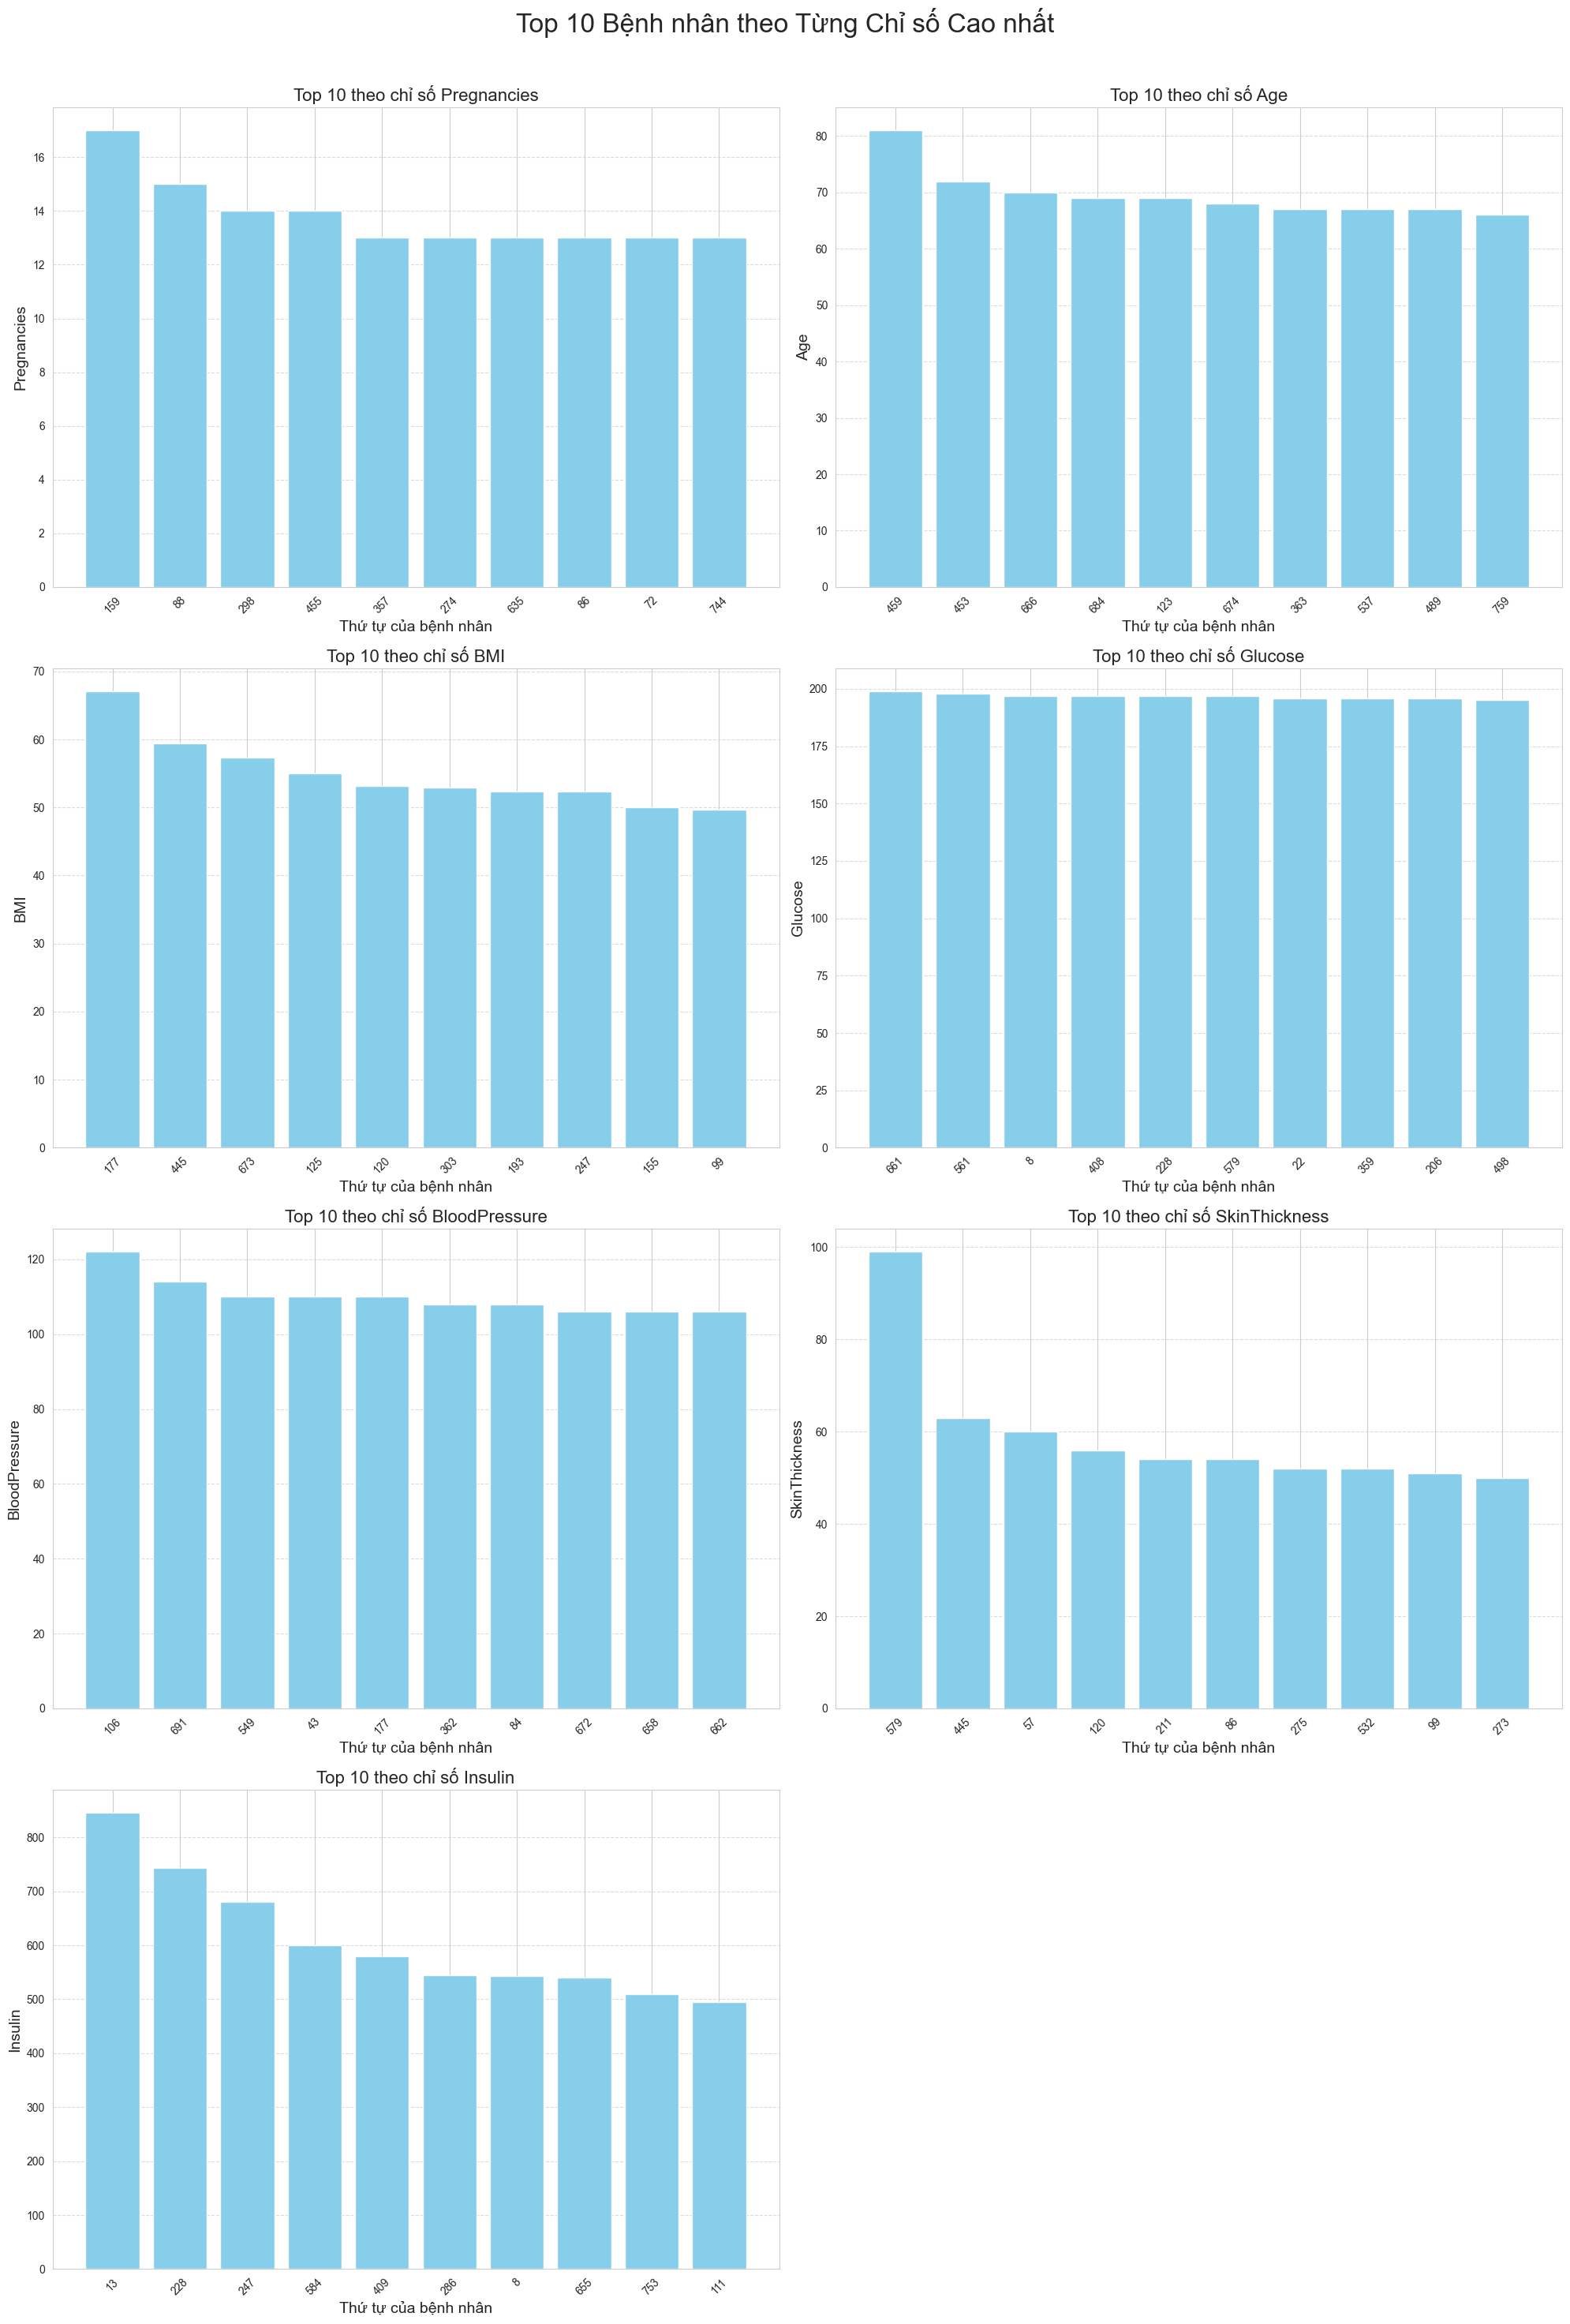

In [47]:

# Danh sách các cột cần vẽ và tiêu đề tương ứng
columns_to_plot = [
    'Pregnancies', 'Age', 'BMI', 'Glucose',
    'BloodPressure', 'SkinThickness', 'Insulin'
]

# Tạo một lưới biểu đồ đủ lớn, ví dụ 4 hàng, 2 cột
fig, axes = plt.subplots(4, 2, figsize=(20, 30))
fig.suptitle('Top 10 Bệnh nhân theo Từng Chỉ số Cao nhất', fontsize=24)

# Dùng .ravel() để làm phẳng mảng axes, giúp dễ lặp qua
axes = axes.ravel()

# Vòng lặp để vẽ từng biểu đồ
for i, col_name in enumerate(columns_to_plot):
    # 1. Sắp xếp theo đúng cột hiện tại
    df_sorted = df_dataset.sort_values(col_name, ascending=False)

    # 2. Lấy dữ liệu top 10
    x = df_sorted.index[:10].astype(str)
    y = df_sorted[col_name][:10]

    # 3. Vẽ biểu đồ vào đúng ô `axes[i]`
    axes[i].bar(x, y, color='skyblue')
    axes[i].set_title(f'Top 10 theo chỉ số {col_name}', fontsize=16)
    axes[i].set_ylabel(col_name, fontsize=14)
    axes[i].set_xlabel('Thứ tự của bệnh nhân', fontsize=14)
    axes[i].tick_params(axis='x', labelsize=10, rotation=45)
    axes[i].tick_params(axis='y', labelsize=10)
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

# Ẩn các ô axes không sử dụng (nếu có)
for i in range(len(columns_to_plot), len(axes)):
    axes[i].set_visible(False)

# Tự động điều chỉnh khoảng cách
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

**Top 10 theo chỉ số Pregnancies**

Bệnh nhân có nhiều lần mang thai nhất là bệnh nhân mang mã số 159, với khoảng 17 lần mang thai.

Bệnh nhân thứ hai là 88 với 15 lần mang thai.

Hai bệnh nhân 288 và 455 có cùng số lần mang thai là 14 lần.

Sáu bệnh nhân còn lại (357, 274, 635, 86, 72, 744) đều có 13 lần mang thai.

**Top 10 theo chỉ số Age**

Bệnh nhân lớn tuổi nhất là người có mã số 459, với khoảng 81 tuổi.

Bệnh nhân thứ hai là 453, khoảng 72 tuổi.

Bệnh nhân 666 khoảng 70 tuổi.

Hai bệnh nhân 684 và 123 đều khoảng 69 tuổi.

Các bệnh nhân còn lại có độ tuổi từ 66 đến 68 tuổi.

**Top 10 theo chỉ số BMI**

Bệnh nhân có mã số 177 có chỉ số BMI cao nhất, khoảng 67.

Các bệnh nhân khác trong top 10 có chỉ số BMI giảm dần, từ khoảng 59 (bệnh nhân 445) xuống đến gần 50 (bệnh nhân 98).

Ý nghĩa: Chỉ số BMI trên 30 thường được coi là béo phì. Các giá trị trong biểu đồ này (từ 50 đến 67) đều ở mức rất cao, cho thấy các bệnh nhân này đang trong tình trạng béo phì cấp độ nặng. 🩺

**Top 10 theo chỉ số Glucose**

Cả 10 bệnh nhân trong danh sách này đều có mức đường huyết rất cao và gần như bằng nhau, dao động trong khoảng 196 đến 199.

Bệnh nhân 661 có chỉ số cao nhất, khoảng 199.

Ý nghĩa: Mức đường huyết lúc đói bình thường thường dưới 100 mg/dL. Các chỉ số cao như trong biểu đồ này là dấu hiệu rõ ràng của tăng đường huyết, một triệu chứng điển hình của bệnh tiểu đường không được kiểm soát tốt.

**Top 10 theo chỉ số BloodPressure**

Bệnh nhân có mã số 106 có chỉ số huyết áp cao nhất, lên tới khoảng 122.

Các bệnh nhân khác trong top 10 có chỉ số huyết áp rất cao, dao động từ 108 đến 114.

Ý nghĩa: Huyết áp bình thường thường dưới 120/80 mmHg. Các chỉ số trong biểu đồ này (từ 108 đến 122) đều ở mức cực kỳ cao. Đây là dấu hiệu của tăng huyết áp nghiêm trọng hoặc một cơn tăng huyết áp, là một tình trạng y tế khẩn cấp và rất nguy hiểm.

**Top 10 theo chỉ số SkinThickness**

Bệnh nhân có mã số 579 có độ dày da cao bất thường, lên tới gần 100 mm. Con số này cao hơn đáng kể so với những người còn lại.

Các bệnh nhân khác trong top 10 có độ dày da dao động từ 52 mm đến 63 mm.

Ý nghĩa: Độ dày nếp gấp da lớn cho thấy tỷ lệ mỡ cơ thể cao. Các giá trị trong biểu đồ này đều rất cao, là một chỉ báo mạnh mẽ của tình trạng béo phì.

**Top 10 theo chỉ số Insulin**

Bệnh nhân cao nhất: Người có mã số 13 có nồng độ insulin cao nhất, khoảng 846.

Phạm vi: Các bệnh nhân khác trong top 10 cũng có mức insulin cực kỳ cao, giảm dần từ khoảng 744 (bệnh nhân 228) xuống đến gần 500 (bệnh nhân 111).